In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
# %matplotlib notebook
%matplotlib inline

In [2]:
from agent.agent import Agent
from functions import *
from envs import TradingEnv
import yaml, os

In [3]:
stock_name = '^HSI_2018'
window_size = 15
with open(os.path.join(os.getcwd(), 'config.yml'), 'r') as stream:
    config = yaml.load(stream)

agent = Agent(window_size, config, is_eval=True)
data = getStockDataVec(stock_name)
env = TradingEnv(data, window_size)

<ipython-input-3-04addce4f48e>:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(stream)


In [4]:
len(data)

492

In [5]:
# data

In [6]:
states = [env.get_state(t) for t in range(len(data))]
x_data = np.array(list(range(len(data))))

/Users/Eric/Desktop/QuantRL/final-product/functions.py:47: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-1*x))


In [7]:
norms = np.zeros((len(states), len(states)))
for i in range(len(states)):
    for j in range(len(states)):
        norms[i][j] = np.sum((states[i] - states[j]) ** 2)

In [8]:
norms

array([[0.        , 0.24999989, 0.50000532, ..., 3.74892201, 3.74891238,
        3.74889823],
       [0.24999989, 0.        , 1.25000467, ..., 3.49892114, 4.49891147,
        4.49889796],
       [0.50000532, 1.25000467, 0.        , ..., 4.24890468, 3.24890025,
        4.24890243],
       ...,
       [3.74892201, 3.49892114, 4.24890468, ..., 0.        , 7.00000366,
        7.99561209],
       [3.74891238, 4.49891147, 3.24890025, ..., 7.00000366, 0.        ,
        7.00001505],
       [3.74889823, 4.49889796, 4.24890243, ..., 7.99561209, 7.00001505,
        0.        ]])

In [9]:
index = 13 # index we choose to analyze similarity to
dists = np.array([np.sum((states[index] - states[j]) ** 2) for j in range(len(states))])

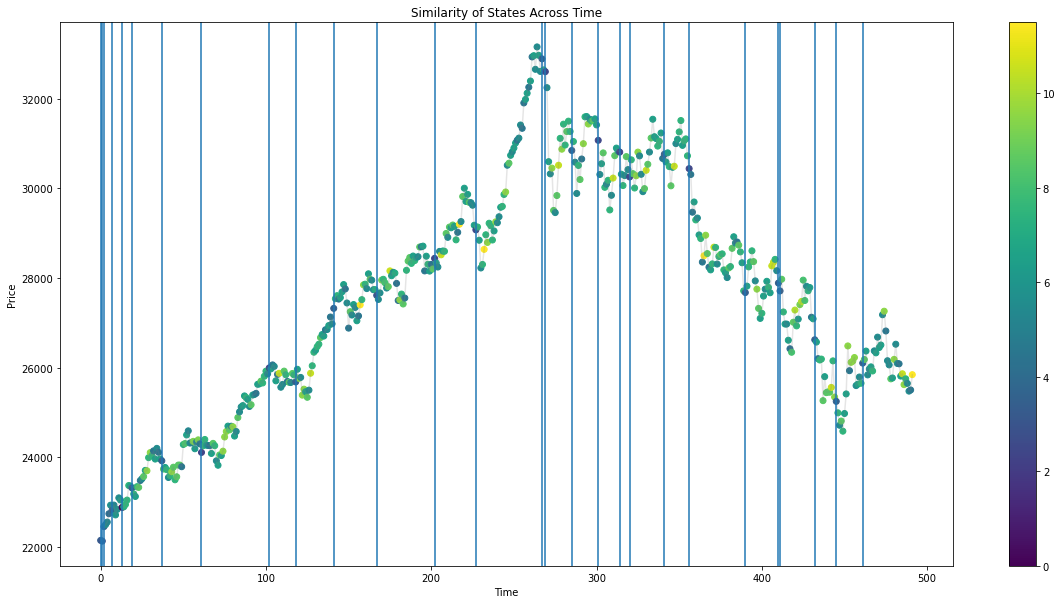

In [10]:
colors = plt.cm.jet(dists)
def color_f(d):
    return colors[d]
inds = np.where(np.array(dists) < 4)[0]
plt.figure(figsize=(20, 10))
plt.plot()
# plt.plot(x_data, dists, '.')
plt.plot(x_data, data, alpha=.2, color="grey")
plt.cm.jet(dists)
for i in inds:
    plt.axvline(i)
plt.scatter(x_data, data, alpha = 1.3, c=dists)
plt.colorbar()
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Similarity of States Across Time")
plt.show()

In [11]:
def scale_dists(states, index):
    """
    Returns a list with scaled distances from every state to the state at index
    """
    distances = np.array([np.sum((states[index] - states[j]) ** 2) + 1 for j in range(len(states))])
    arr = (distances - 2 * distances.std())
    arr = arr * (arr > 0)
#     arr = (np.array([np.sum((states[index] - states[j]) ** 2) + 1 for j in range(len(states))]) / 3) ** 0.5
    return arr**0.5

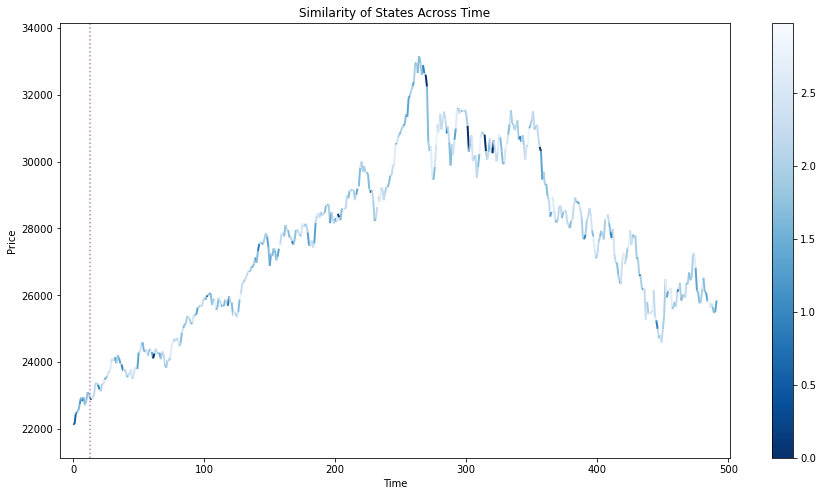

In [12]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

colors = plt.cm.jet(np.linspace(0,1,len(dists)))
def color_f(d):
#     print(colors[d])
    return colors[d]
inds = np.where(np.array(dists) < 4)[0]
# plt.figure(figsize=(20, 10))
# plt.plot()
# plt.plot(x_data, data, alpha=.2, color="grey")
plt.cm.jet(dists)
for i in inds:
    continue
#     plt.axvline(i) 

fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlim(min(x_data)-10,max(x_data)+10)
ax.set_ylim(min(data)-1000, max(data)+1000)
ax.axvline(index, ls=":", color="purple", alpha=0.5)

points = np.array([x_data, data]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a continuous norm to map from data points to colors
dists = scale_dists(states, index)
norm = plt.Normalize(dists.min(), dists.max()) 
color_map = plt.cm.get_cmap('Blues')

lc = LineCollection(segments, cmap=color_map.reversed(), norm=norm)
# Set the values used for colormapping
lc.set_array(dists)
lc.set_linewidth(2)
line = ax.add_collection(lc)
fig.colorbar(line,ax=ax)



ax.set_xlabel("Time")
ax.set_ylabel("Price")
ax.set_title("Similarity of States Across Time")
plt.show()

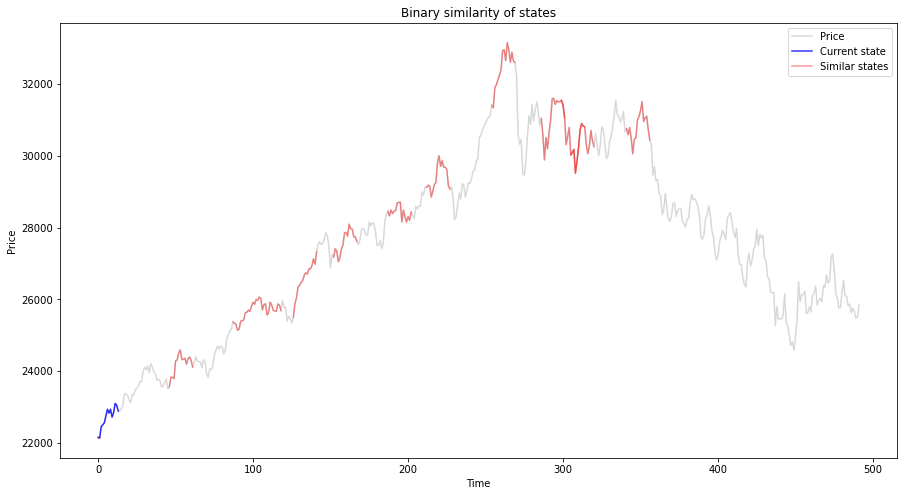

In [13]:
colors = plt.cm.jet(dists)
# print(dists)
dists_np = np.array(dists)
# Within 2 standard deviations of mean
inds = np.where(dists_np < (dists_np.mean() - 2 * dists_np.std()))[0]
plt.figure(figsize=(15, 8))
plt.plot()
# plt.plot(x_data, dists, '.')
plt.plot(x_data, data, alpha=.3, color="grey")
l = max(0,index-window_size)
plt.plot(x_data[l:index+1], data[l:index+1], alpha=.8, color="blue")
plt.cm.jet(dists)
for i in inds:
    l = max(0,i-window_size)
    color = "red"
    alpha = .4
    if i == index:
        continue
    plt.plot(x_data[l:i+1], data[l:i+1], alpha=alpha, color=color)
    size = 8
#     plt.scatter([l,i], [data[l],data[i]], marker="o", c="black", alpha=.4, s=size)
#     plt.scatter(i, data[i], marker="o", c="black", alpha=.4, s=size)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Binary similarity of states")
plt.legend(["Price", "Current state","Similar states"])
# plt.plot(np.linspace(0,10,1))
l = max(0,i-window_size)
model_trend = (np.array(data[l:i+1]) - data[l])*4 + 28000
# plt.plot(np.linspace(l,i+2,(i-l+1)), model_trend, color="blue")
print()
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.ion()
plt.plot(x_data, new_data, '.')
plt.plot(x_data, dists, '.')
plt.axvline(13)


In [ ]:
# 100 epochs
one_dataset = [577466.4395870012, 140035.35613599993, 845332.3321580018, 296465.5042610001, 197584.32737899994, 494750.7727179994, 189236.94143600005, 162846.67978899978, 79985.199315, 138631.62147800004, 166137.08409899997, 94594.52648800006, -11247.08987199998, 90364.20847899996, -48194.25352799997, 73013.53931000005, 133798.475942, 32493.168825999946, 128099.349029, 130897.3471459999, 160457.73207700014, 118649.33560500023, 65957.58841800009, 174955.12121600003, 428969.6297670001, 55943.74110100005, 215570.2580370001, 149757.03039100004, -75936.4971729999, 57517.70710999986, 23010.079458999982, 150944.77268799994, 306071.60561900015, 149079.26865499993, 111962.24962599995, 170977.15943499948, 158843.23608399995, 52729.24550100004, 221671.45945999984, -10879.721709000078, 178454.80225299986, 10117984.435951, 10035466.69339201, 10611846.49464801, 10642516.769326996, 9663766.04814801, 10206257.037604015, 10331268.162173014, 10078156.002887007, 10008986.012257999, 10038589.788877018, 34739.56054999996, 5177.779893999981, 20586.783579999956, 9328.717786999947, 35291.419050999975, 11997.328970000046, 26709.501934000087, -21458.592396000102, 34760.507074999994, 21416.229128000043, 633681.4511679993, 44832.08580300002, 25535.098254999906, 196968.26404100007, 601659.1872729996, 699118.3114040003, 167719.06629500003, 512743.95898100105, 805373.5025509993, 198506.63816999996, 797402.1835940005, 1248995.5515400008, 102492.66281599988, 125352.18674399992, 264767.4733810001, 341143.2497550004, 351268.67762200016, 366509.20765899995, 424667.2580529995, 351339.6783509997, 702.4673939999848, 18199.54931900003, 25188.227427999915, 8853.815170000009, -580.8605909999769, 1313.253776999999, 7670.413600999964, 1755.4224819999972, 1992.7448660000446, 11922.645879000003, 188008.8779379998, 560814.1408599999, 70069.89722200003, 398745.26709100005, 335900.40955800004, 506843.93383899954, 391684.0931339996, 772511.4742420001, 253249.48097200014, 205535.6121909999]

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)
def init():
    line.set_data([], [])
    return (line,)

In [ ]:
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [ ]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

In [ ]:
HTML(anim.to_jshtml())

In [ ]:
import csv

In [ ]:
test_name = "^HSI_2018"
test_data = np.array(getStockDataVec(test_name))
l = len(test_data) - 1
x_data = range(l)

In [ ]:
df = pd.read_csv('test_progression_OLD.csv', header=None, sep='\n')
df = df[0].str.split(',', expand=True).astype(np.float)
df.shape

In [ ]:
# From here the plotting starts

plt.figure(figsize=(10, 10))
plt.plot(x_data, test_data[:-1])

plt.title(test_name)

i = 0
for col, row in df.iterrows():
    indices = row.to_numpy()
    indices = indices[np.isfinite(indices)].astype(int)
    if (i % 2 == 0):
        plt.plot(indices, test_data[indices], '.',marker='o',markersize=8, markerfacecolor='r')
    else:
        plt.plot(indices, test_data[indices], '.',marker='o', markersize=8, markerfacecolor='g')
    if i == 1:
        break
    i+= 1
plt.legend(['close', 'buy', 'sell'], loc='upper left')

'''
textstr = '\n'.join((
    r'$\epsilon=%.4f$' % (eps, ),
    r'$\mathrm{median}=%.2f$' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))

props = dict(boxstyle='round', facecolor='gray', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
'''

plt.show()

In [ ]:
row = df[:1].to_numpy()
print(df)

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

ax.set_xlim(( -15, 515))
ax.set_ylim((20000, 34000))



close_plot, = ax.plot(x_data, test_data[:-1])
buys_plot, = ax.plot([], [], '.',marker='o',markersize=8, markerfacecolor='r')
sells_plot, = ax.plot([],[], '.',marker='o',markersize=8, markerfacecolor='g')



ax.legend(['close', 'buy', 'sell'], loc='upper left')


def init():
    buys_plot.set_data([], [])
    sells_plot.set_data([],[])
    return (close_plot, buys_plot,sells_plot)

In [ ]:
def animate(i):
    ax.set_title("Episode " + str(i) + " / " + str(df.shape[0] // 4))
    i *= 2
    buys = df[i:i+1].to_numpy()
    sells = df[i+1:i+2].to_numpy()
    buys = buys[np.isfinite(buys)].astype(int)
    sells = sells[np.isfinite(sells)].astype(int)
    sells_plot.set_data(sells,test_data[sells])
    buys_plot.set_data(buys,test_data[buys])
    return (close_plot, buys_plot,sells_plot)

In [ ]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int(df.shape[0]/4), interval=50, 
                               blit=True)

In [ ]:
HTML(anim.to_jshtml())

In [ ]:
one_profit_list = [(677968.5959490009, 42.607551358588516), (598424.2907779999, 83.58937307355781), (556995.2330090009, 81.54627066797262), (227445.2307249996, 43.01157777433111), (115048.91127199994, 18.584192025699902), (248904.36811799975, 135.84806639727762), (212516.07996899995, 92.14809270547335), (-7219.065888999983, -2.0315210224290774), (170449.7365750002, 43.438038680567686), (333750.9492260001, 97.86777786604468), (78661.11111400003, 23.937134137263786), (412090.93197700055, 123.09233737687634), (408525.9863330001, 53.48903356835946), (173134.965928, 52.033052836658925), (54450.03869799991, 7.1196813722277), (-103754.79456600006, -18.18096186174935), (453777.51746399986, 70.22145026433651), (345397.6450249995, 73.73373952709856), (41369.27900699994, 9.674951687125901), (214537.57166299984, 63.45165375727475), (151647.19045299984, 69.3006384622174), (8878509.856012993, 52.617540274488114), (9240670.600615, 53.78879300240612), (9435217.455728004, 52.12783834211948), (9041980.87809, 45.380656093513736), (9816058.602482012, 60.085569580126915), (10038817.860999992, 51.743068712363325), (10223229.760025, 50.38886270803802), (9813630.63227, 45.621954316109026), (9818626.150535999, 45.093280025926774), (9507740.362364002, 44.46008881500652), (45662.29675699989, 28.41615732502577), (44714.653073999994, 34.73389609854461), (99387.60826499993, 58.70437705078274), (651.0062139999973, 0.29896575397028674), (24433.602692999946, 12.585679952416227), (59791.56322500008, 32.23831209221235), (33575.311409999966, 24.480434013489788), (-2262.1875980000004, -1.2334781984729088), (19413.977435999994, 13.932455231015739), (46997.248805999945, 41.5014847140472), (10228.209102000006, 8.947459761219566), (14016.319803999966, 14.128459968792365), (34765.96701499999, 22.987224688274885), (-28160.787109000008, -20.599238099898834), (-19807.066558000006, -10.945901178511523), (-17309.565794000002, -6.059511153465474), (32195.865987000027, 30.32733512492754), (44067.93516800008, 49.32349067054743), (-6637.297994999986, -3.184172721211979), (-841.6591819999685, -0.6155226296393483), (57787.77491599998, 57.10385779864916), (9606.332657999961, 5.432049938899759), (15810.539282000067, 9.273594283712884), (23490.71252000002, 11.088120255680375), (-21709.44249599996, -11.042924213758399), (35814.867080000025, 31.541229436687352), (8862.502704999959, 2.7632326262331164), (10152.991930000024, 7.845745079254075), (24285.756710000063, 20.289834808603572), (24516.176522000053, 19.005070677962607), (17247.050806999985, 15.427028178259828), (15797.323268999968, 10.67484621829206), (-7197.33336200001, -6.983211765116226), (-6163.859231999935, -5.777542189355161), (17939.23584199997, 10.3918720311451), (17954.533193000025, 14.616339174523082), (-5226.92321399998, -5.199415292481763), (13770.034667999955, 11.92086925386519), (-6772.012324000038, -7.374275400700194), (21791.76979199997, 22.237081300364892), (11138130.975883003, 20.922247845276402), (10578123.038630005, 19.423122643054157), (10989333.836359004, 20.196606219336484), (10776154.488332016, 19.39645539329548), (10934555.548745997, 19.747809367642564), (10646782.541180002, 18.70081872902442), (10698460.385051, 19.312154988213), (10441895.761643015, 18.056448911290925), (10590654.12225201, 18.334682004450535), (10414171.930702006, 17.857677155383545), (9114.025894000017, 14.002573110287026), (2936.029762000052, 3.4541473625957546), (-1098.6564880000096, -1.1692650927760855), (3546.0404059999873, 4.465342505445589), (-10390.591063999993, -13.530203889541607), (7422.430900999994, 8.515183697049617), (13361.320457000014, 14.672071160341158), (13977.34459, 24.497458071049824), (7002.594486999933, 8.92884474869769), (8311.401616999976, 12.609883668624683), (2871141.648938, 58.99698969535822), (3617644.575079003, 64.90674885620726), (2654884.364611002, 54.2760421244179), (3260434.2701560026, 54.16540037549142), (2558970.6694460027, 40.49787294075614), (3455203.589611003, 62.309488216411424), (3218792.8689019983, 60.8451730780727), (2834296.036875999, 44.163391505135884), (3413930.035286999, 62.19161351535237), (3387594.8590180017, 59.682557588939034), (5838.79467600001, 10.03235364991529), (-2490.3354340000296, -2.8529734485275675), (410.60472299999674, 0.5488146961587845), (-2147.1595309999657, -3.650611125573332), (-328.28686499995, -0.47250915633691726), (4011.7470639999865, 9.163387903744376), (-5396.274901000027, -8.900586612764881), (-291.8449630000255, -0.5429196185308163), (3355.5380840000053, 6.44762604132029), (-6799.901608999997, -8.407455019396403), (1730.0815420000145, 2.942391072943157), (-160.38952300000028, -0.2919955770249967), (290.2320510000154, 0.5742615459169486), (1614.5234460000056, 2.930186783558762), (-9.648429000028955, -0.018654218710453713), (1016.2263160000234, 2.258743614710241), (3236.156493000035, 7.468863660877751), (-1585.3432630000007, -3.369657041403735), (-541.354246000014, -1.1556346170330551), (-4994.504150999981, -9.676028422135982), (11630730.48209602, 17.820220841247302), (11410327.39983501, 17.335746253551523), (11582050.466360997, 17.62491838043173), (10893655.77507101, 15.950815110436498), (11478030.51213201, 17.20182076220004), (11275368.603692003, 16.747181119520366), (11022526.963058008, 16.051472696147602), (10697026.112965005, 15.328616041007528), (11046038.688160012, 15.923363997293375), (10890660.007984007, 15.55011735092518), (57947.581172000006, 70.92462447204029), (39254.518191999996, 25.65881686720862), (57326.89965700001, 213.83373154470053), (7511.159787999994, 10.640676410537083), (64754.051637, 309.8695071665819), (36564.508422000006, 61.05536455998733), (88427.408692, 109.41790769918791), (38158.855345, 26.268651062046306), (111204.362185, 88.04260051664204), (39386.060916, 62.900894806365784), (-420.5170880000087, -1.6860124687536753), (-1079.4624059999896, -4.305750213067588), (-193.46191199999885, -0.8271614680666615), (-2524.5883779999976, -9.686625573833757), (417.89233600000216, 1.5951270993017435), (910.7871100000002, 3.8604268340937957), (730.8820809999975, 3.09415134156863), (-702.5517580000014, -2.4605145686292986), (-1690.7263169999965, -6.419734177251339), (43.53198399999883, 0.1845742529209395), (574.3488809999908, 1.3671353745800319), (2827.5444379999867, 7.042796472743089), (1431.625492999991, 3.4456022092099365), (1585.3063969999948, 3.8301423401542287), (533.7719769999944, 1.2576560727978061), (-382.292234000005, -0.875204089849507), (845.5217289999946, 2.0069322524448734), (2076.37964199999, 5.082497438593746), (1548.5100109999985, 3.7676551515071948), (1935.9846239999933, 4.717357962562775), (11052377.06659101, 73.0836538661107), (11227960.659361005, 72.08162806568745), (11045779.096858995, 72.21266628982283), (11082358.773868004, 73.93410524434199), (11042079.49066098, 70.69558654308977), (11266911.232113982, 72.88211489173446), (10992408.11151401, 71.63019387651602), (11179729.945498997, 71.42128172336388), (11181724.738463, 71.34086426861298), (11167944.602720976, 71.48290026715765), (217366.148438, 0.21975112228032295), (225402.208255, 0.22828563535777333), (281972.24170099996, 0.28565562446933895), (289930.466312, 0.2937254754435082), (236687.73974799996, 0.2394884266988052), (314626.93212899996, 0.3189188311289181), (376517.888185, 0.38271974641524864), (272997.21875299996, 0.27680775355746184), (281097.90088, 0.2848333883395228), (321138.79345700005, 0.3253518677547669), (-797.8691389999922, -2.807748384440459), (1620.021973000009, 5.52437537589074), (-1696.7318109999965, -5.855671178659508), (1587.9716799999978, 5.945239752034878), (488.4401879999955, 1.8003440635537185), (-1503.957030999998, -5.232291278765129), (-540.2004389999979, -1.927454126919311), (-25.85485799999742, -0.0924840998416136), (1419.9077170000028, 5.419720042948621), (454.86254799999506, 1.6901245822315578), (280249.56702, 0.4947854253710033), (218957.94751199998, 0.3864559361477559), (252475.109741, 0.4461719995705166), (208729.79748699997, 0.3676262820651078), (282491.77649300004, 0.5000036268902426), (242546.9823, 0.428121695349927), (284276.762086, 0.5023556646500474), (328634.004519, 0.5821137774923013), (267354.062865, 0.47165401257181205), (208526.356812, 0.36792035668946327), (-34707.75854499996, -9.685561925634165), (-25189.759765, -7.669272526330473), (-38307.14624299995, -10.656732849426378), (-18880.62133099998, -5.532280902527093), (-32713.70092499997, -9.197034836738258), (-29520.211424000023, -8.399890293846678), (-45668.48510599995, -11.8243494839117), (-41481.74731599995, -11.37542255000029), (-33328.56323299998, -9.365004586125561), (-24360.33325199997, -7.914052114317631), (16136.269530000009, 48.81914301950483), (42467.36108300001, 110.68539292815063), (-1599.6090129999866, -3.42115749099496), (18485.022947000005, 32.73811593153843), (27675.239498000006, 102.65482563217296), (33304.160149999996, 52.195633737928695), (-4932.880618999991, -6.73824778205419), (25375.059813, 94.0962986414679), (12958.996581999996, 22.568595987525118), (21546.561523000008, 29.06199326418104), (230554.571534, 0.2331478597986907), (179844.91040199998, 0.18175247830577776), (255997.427981, 0.25909683703875863), (189717.39086999994, 0.1916351133829166), (216284.031741, 0.21884841956759665), (385663.510989, 0.39144111066386705), (298967.070072, 0.3028879478284013), (313777.90894, 0.3179984525060599), (282737.650881, 0.28667559080559873), (273427.737555, 0.27715858599197163), (10008.349610000005, 36.472684252142706), (-7123.337646999993, -13.82024940645448), (2955.0117190000046, 8.835093078243142), (31353.011230000004, 55.482372998288895), (-7476.812012000004, -7.291953478635679), (2803.4700950000006, 7.338464201885615), (2208.9418940000123, 5.270747631397894), (5504.140380999996, 22.48248893219116), (14435.170657000002, 48.142511521373585), (2159.7473180000015, 7.286862002292553), (-6374.648041000022, -2.7769437526635987), (-1726.6231369999714, -0.874504612204146), (-14320.684659999974, -6.637107932290137), (-21289.177825999996, -9.622315135100417), (-10158.638275000008, -4.446615369248782), (-24347.923917000026, -10.240759608401612), (-9810.399994999956, -4.639016587225958), (-363.83334400000604, -0.1802338969624252), (-9031.208097999974, -3.611173834529931), (-15733.013033000021, -6.706089633555831), (3260635.2273180014, 4.44672718358687), (3243359.3664789996, 4.427803722649894), (3217048.1897200025, 4.392979725264365), (3369994.628932001, 4.613684929482224), (3272322.2507580016, 4.467717896129546), (3152284.480738, 4.291291139138805), (3208268.218286001, 4.367202855368778), (3270692.230739002, 4.466706411546008), (3357520.728300001, 4.60084831331492), (3195895.920923, 4.358668189288965), (-3113.8901389999983, -11.22389918246753), (-131.77904800000715, -0.5806671855847773), (1859.450684999997, 7.000053184083951), (341.01416199999676, 1.47526715582707), (-1218.090577999999, -5.096067168823834), (228.86279399999876, 0.9732883616954365), (265.6020520000038, 1.1507355443689176), (-1094.2675769999905, -3.950851241789756), (886.1992189999964, 3.898216827243094), (944.1569859999959, 4.076594732873778), (332568.029544, 0.337965604393851), (474834.39135700016, 0.48410736095269286), (372136.461919, 0.37836412736140634), (535785.760011, 0.5468787603306415), (365626.47095, 0.37227680992559686), (556792.710694, 0.5696500498361611), (459826.71851, 0.468433408453734), (410882.2033699999, 0.41819613350932733), (459666.1115750001, 0.467955827972312), (399991.89038299996, 0.4071045481225514), (-874.4230959999877, -0.980617956465286), (4618.977785000003, 5.451793508569399), (-3121.300540999984, -4.344329046855674), (3050.880612000015, 4.3955488885711524), (2728.406736000019, 2.999049789935335), (11915.81030100001, 15.040289380168337), (5498.270995000015, 6.256481492436955), (5407.925535000026, 6.39367822802411), (1557.1542960000115, 1.6831512865272242), (3805.553220000007, 4.249430027027827), (1764905.6812920007, 107.60890010962709), (1838094.6161030007, 102.96551863377023), (1946692.416639003, 111.19904383613853), (1769441.3014099991, 104.71795421795002), (1890315.664447, 97.20856178710999), (2018922.3490139984, 114.76945772831225), (1691468.3868539978, 99.85394189435341), (1876113.4095599991, 104.79427878365435), (1933780.760634999, 109.95103845437808), (1766878.8907619987, 105.09857174850869), (541.6660160000038, 2.264145245677417), (1465.8986779999937, 6.718555051701522), (1268.699216000011, 5.354184484431036), (-493.75854500000924, -2.0035821934747573), (-1413.309325000008, -5.654459027523317), (-786.2705060000044, -1.8916630545313378), (-179.9587450000049, -0.7856494562752099), (338.57226599999467, 1.1292058695332523), (364.71630899999127, 1.304821455421706), (1444.3837840000024, 3.707816293139469), (-36170.786979000004, -7.262646604167388), (-50400.953605999974, -9.83870875228085), (-41949.40612099997, -7.988610927688475), (-51845.295035000025, -9.744517750451157), (-45202.135615000014, -9.316054778667066), (-45134.191280000035, -9.004726378726025), (-35819.74620999999, -7.875430658322437), (-44168.08263400001, -8.37839510627154), (-46082.23668799998, -9.426662681830194), (-48923.63707800008, -10.001372170679554), (5381847.131612016, 50.53712653885065), (5387801.903330999, 51.581760707803305), (5314420.789318011, 51.28598365334083), (5606743.975602004, 51.48516741852441), (5339255.257582007, 50.32764855456254), (5152938.849861991, 50.005456735148194), (5499637.585218006, 51.60180907178346), (5399645.4707169905, 50.37027096987446), (5371014.953874998, 51.3097850683732), (5412161.082775992, 51.82114543997394), (-787.5205089999981, -2.8754720923712696), (-677.7487810000061, -2.8223600778836766), (592.5712890000041, 2.5670806685829057), (2049.50073499999, 8.058710258743004), (844.8085969999975, 3.593741744864282), (472.2871080000041, 2.047153323133631), (450.25683400001435, 1.6859873479984966), (1274.4407930000075, 5.112001167955111), (-4.50769099999934, -0.01843203672984526)]

In [1]:
from agent.agent import Agent
from envs import TradingEnv
from functions import *
import torch
import yaml, os
import csv

In [2]:
def write_to_csv(writer, environment, epsilon, t):
    """
    Writes three rows to csv: 
        first is profit, value held, max_staked, and epsilon; 
        second is buy indices; 
        third is sell indices
    """
    writer.writerow([environment.net_profit(t), environment.value_held(t), environment.max_spent,epsilon])
    writer.writerow(environment.buys)
    writer.writerow(environment.sells)

In [10]:
profits_list = [] # Will hold list of all profits as we go through training
with open(os.path.join(os.getcwd(), 'config.yml'), 'r') as stream:
    config = yaml.load(stream)

test_name = "^HSI_2018"
stock_name, window_size, episode_count = config['stock_name'], config['window_size'], config["num_epochs"]

num_tech_indicators = config['num_tech_indicators']
agent = Agent(window_size + num_tech_indicators, config)
data = getStockDataVec(stock_name)
test_data = getStockDataVec(test_name)
env = TradingEnv(data, window_size)
env_test = TradingEnv(test_data, window_size)
l = len(data) - 1
l1 = len(test_data) - 1

test_portfolio = []  # test_portfolio[i] will hold a tuple of the list of all buys and sells
out_filename = "test_progression5.csv"
out_writer = open(out_filename,'a')
writer = csv.writer(out_writer, delimiter=',')
train_out_writer = open("train_progression5.csv",'a')
train_writer = csv.writer(train_out_writer,delimiter=',')
episode_count = 400
for e in range(episode_count + 1):
    print("Episode " + str(e) + "/" + str(episode_count))
    state = env.get_state(0)

    env.reset_holdings()
    total_reward = 0

    for t in range(l):
        action = agent.act(state)

        # sit
        next_state = env.get_state(t + 1)
        reward = 0

        if action == 1: # buy
            #remembers the price bought at t, and the time bought
            env.buy(t)
            # print("Buy: " + formatPrice(data[t]))

        elif action == 2: # sell
            reward, profit = env.sell(t)
            
            # print("Sell: " + formatPrice(data[t]) + " | Profit: " + formatPrice(profit))

        done = True if t == l - 1 else False
        # Push all values to memory
        agent.memory.push(state, action, next_state, reward)
        state = next_state
        total_profit = env.net_profit(t)
        max_staked = env.max_spent
        total_reward += reward
        
        

        if done:
            # First we test the agent
            env_test.reset_holdings()
            state1 = env_test.get_state(0)

            for t1 in range(l1):
                action = agent.act(state1)
                if action == 1:
                    env_test.buy(t1)
                elif action == 2:
                    env_test.sell(t1)
                state1 = env_test.get_state(t1+1)

            # then we record our progress in the csv's
            write_to_csv(writer, env_test, agent.epsilon, t1)
            write_to_csv(train_writer, env, agent.epsilon, t)
            test_percent_return = env_test.net_profit(t1) / env_test.max_spent * 100
            
            
            percent_return = total_profit / max_staked * 100
            print("--------------------------------")
            print("Total Profit: " + formatPrice(total_profit))
            print("Max staked: " + formatPrice(max_staked))
            print("Percent return: " + "{0:.2f}%".format(percent_return))
            print("Total reward: " + str(reward))
            print("Test net spent: " + formatPrice(env_test.max_spent))
            print("Test net profit: " + formatPrice(env_test.net_profit(t1) - env_test.value_held(t1)))
            print("Test return: " + "{0:.2f}%".format(test_percent_return))
            print("--------------------------------")
            profits_list.append((total_profit, percent_return))
#             print(profits_list)
        agent.optimize()

    if e % config['save_freq'] == 0:
        agent.target_net.load_state_dict(agent.policy_net.state_dict())
        torch.save(agent.policy_net, config['policy_model'])
        torch.save(agent.target_net, config['target_model'])
        
out_writer.close()
train_out_writer.close()

<ipython-input-10-7d72b6387d0b>:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(stream)


Episode 0/400
--------------------------------
Total Profit: $496544.87
Max staked: $349638.47
Percent return: 142.02%
Total reward: 0
Test net spent: $363410.32
Test net profit: $1477.46
Test return: 0.41%
--------------------------------
Episode 1/400
--------------------------------
Total Profit: $2449331.48
Max staked: $746257.55
Percent return: 328.22%
Total reward: 0
Test net spent: $747233.59
Test net profit: $6562.63
Test return: 55.49%
--------------------------------
Episode 2/400
--------------------------------
Total Profit: $3053111.15
Max staked: $2141034.35
Percent return: 142.60%
Total reward: 0
Test net spent: $1597824.29
Test net profit: -$44592.31
Test return: 85.00%
--------------------------------
Episode 3/400
--------------------------------
Total Profit: $3281825.34
Max staked: $2131472.91
Percent return: 153.97%
Total reward: 0
Test net spent: $741728.33
Test net profit: -$33289.12
Test return: 71.16%
--------------------------------
Episode 4/400
-------------

--------------------------------
Total Profit: $3796637.02
Max staked: $2614282.57
Percent return: 145.23%
Total reward: 0
Test net spent: $564886.82
Test net profit: -$53222.06
Test return: 44.76%
--------------------------------
Episode 35/400
--------------------------------
Total Profit: $6183350.39
Max staked: $2594443.84
Percent return: 238.33%
Total reward: 0
Test net spent: $428237.05
Test net profit: $29146.12
Test return: 12.76%
--------------------------------
Episode 36/400
--------------------------------
Total Profit: $6206738.83
Max staked: $3379468.27
Percent return: 183.66%
Total reward: 0
Test net spent: $758573.01
Test net profit: $65275.54
Test return: 52.31%
--------------------------------
Episode 37/400
--------------------------------
Total Profit: $2289954.70
Max staked: $1245148.43
Percent return: 183.91%
Total reward: 0
Test net spent: $307624.43
Test net profit: $25409.86
Test return: 49.71%
--------------------------------
Episode 38/400
-------------------

--------------------------------
Total Profit: $42719004.28
Max staked: $19373476.61
Percent return: 220.50%
Total reward: 9793.890625000002
Test net spent: $2447053.17
Test net profit: $240790.24
Test return: 106.77%
--------------------------------
Episode 68/400
--------------------------------
Total Profit: $44271326.19
Max staked: $20873484.51
Percent return: 212.09%
Total reward: 12184.799804000002
Test net spent: $3080128.40
Test net profit: $171214.84
Test return: 99.95%
--------------------------------
Episode 69/400
--------------------------------
Total Profit: $42022787.01
Max staked: $20039752.71
Percent return: 209.70%
Total reward: 8759.969726000001
Test net spent: $2210304.90
Test net profit: $30770.31
Test return: 93.70%
--------------------------------
Episode 70/400
--------------------------------
Total Profit: $45021157.77
Max staked: $21780928.78
Percent return: 206.70%
Total reward: 0
Test net spent: $4014264.68
Test net profit: $172472.98
Test return: 95.15%
---

--------------------------------
Total Profit: $1510194.17
Max staked: $830817.55
Percent return: 181.77%
Total reward: 0
Test net spent: $382397.43
Test net profit: -$12625.27
Test return: 30.05%
--------------------------------
Episode 101/400
--------------------------------
Total Profit: $44714.07
Max staked: $100023.02
Percent return: 44.70%
Total reward: 0
Test net spent: $133230.66
Test net profit: $3443.30
Test return: 60.01%
--------------------------------
Episode 102/400
--------------------------------
Total Profit: $28597.43
Max staked: $273017.18
Percent return: 10.47%
Total reward: 216.15039000000252
Test net spent: $112919.20
Test net profit: $380.32
Test return: 22.92%
--------------------------------
Episode 103/400
--------------------------------
Total Profit: $79691.27
Max staked: $139885.42
Percent return: 56.97%
Total reward: 61.84960900000078
Test net spent: $119337.41
Test net profit: $1091.13
Test return: 0.91%
--------------------------------
Episode 104/400


--------------------------------
Total Profit: $8924326.98
Max staked: $4557441.13
Percent return: 195.82%
Total reward: 1915.3808590000008
Test net spent: $866119.79
Test net profit: -$37324.41
Test return: 78.14%
--------------------------------
Episode 135/400
--------------------------------
Total Profit: $7877907.49
Max staked: $3339841.39
Percent return: 235.88%
Total reward: 1738.6210930000016
Test net spent: $928624.47
Test net profit: -$50001.28
Test return: 71.52%
--------------------------------
Episode 136/400
--------------------------------
Total Profit: $7004108.18
Max staked: $2724430.21
Percent return: 257.09%
Total reward: 0
Test net spent: $1363231.57
Test net profit: $1821.64
Test return: 88.06%
--------------------------------
Episode 137/400
--------------------------------
Total Profit: $5734339.57
Max staked: $2812865.84
Percent return: 203.86%
Total reward: 0
Test net spent: $1845124.46
Test net profit: $63288.93
Test return: 94.66%
----------------------------

--------------------------------
Total Profit: $5827456.60
Max staked: $2480673.04
Percent return: 234.91%
Total reward: 0
Test net spent: $971545.83
Test net profit: $19885.67
Test return: 99.18%
--------------------------------
Episode 168/400
--------------------------------
Total Profit: $9218420.38
Max staked: $3479806.24
Percent return: 264.91%
Total reward: 0
Test net spent: $523115.55
Test net profit: -$46688.89
Test return: 59.33%
--------------------------------
Episode 169/400
--------------------------------
Total Profit: $8775173.81
Max staked: $4990371.43
Percent return: 175.84%
Total reward: 0
Test net spent: $831465.52
Test net profit: -$33568.35
Test return: 72.65%
--------------------------------
Episode 170/400
--------------------------------
Total Profit: $6623934.82
Max staked: $2665583.37
Percent return: 248.50%
Total reward: 0
Test net spent: $488171.49
Test net profit: $4273.76
Test return: 84.47%
--------------------------------
Episode 171/400
---------------

--------------------------------
Total Profit: $106990112.22
Max staked: $59895071.52
Percent return: 178.63%
Total reward: 0
Test net spent: $7742268.80
Test net profit: $305294.63
Test return: 97.50%
--------------------------------
Episode 202/400
--------------------------------
Total Profit: $105492884.37
Max staked: $59335159.53
Percent return: 177.79%
Total reward: 0
Test net spent: $7212922.49
Test net profit: $322786.28
Test return: 98.18%
--------------------------------
Episode 203/400
--------------------------------
Total Profit: $105652645.27
Max staked: $59628219.28
Percent return: 177.19%
Total reward: 0
Test net spent: $7304574.73
Test net profit: $287929.58
Test return: 97.51%
--------------------------------
Episode 204/400
--------------------------------
Total Profit: $108323301.25
Max staked: $60613208.50
Percent return: 178.71%
Total reward: 0
Test net spent: $7815442.35
Test net profit: $274580.48
Test return: 97.17%
--------------------------------
Episode 205/

--------------------------------
Total Profit: $32029.67
Max staked: $99152.37
Percent return: 32.30%
Total reward: 0.0001
Test net spent: $318571.25
Test net profit: -$4767.96
Test return: -1.50%
--------------------------------
Episode 236/400
--------------------------------
Total Profit: $26867.40
Max staked: $84936.17
Percent return: 31.63%
Total reward: 0
Test net spent: $416069.48
Test net profit: -$8925.28
Test return: -2.15%
--------------------------------
Episode 237/400
--------------------------------
Total Profit: $2072.33
Max staked: $85737.67
Percent return: 2.42%
Total reward: 0
Test net spent: $321005.09
Test net profit: -$6135.17
Test return: -1.91%
--------------------------------
Episode 238/400
--------------------------------
Total Profit: $17902.48
Max staked: $73268.57
Percent return: 24.43%
Total reward: 0
Test net spent: $192753.65
Test net profit: $1729.70
Test return: 0.90%
--------------------------------
Episode 239/400
--------------------------------
To

--------------------------------
Total Profit: $84713388.79
Max staked: $44933122.97
Percent return: 188.53%
Total reward: 0
Test net spent: $5080770.72
Test net profit: $270421.26
Test return: 99.19%
--------------------------------
Episode 270/400
--------------------------------
Total Profit: $84984767.74
Max staked: $45033790.94
Percent return: 188.71%
Total reward: 0
Test net spent: $5227461.28
Test net profit: $277959.42
Test return: 98.99%
--------------------------------
Episode 271/400
--------------------------------
Total Profit: -$33675.32
Max staked: $277129.44
Percent return: -12.15%
Total reward: 0
Test net spent: $114802.27
Test net profit: $3948.46
Test return: 92.30%
--------------------------------
Episode 272/400
--------------------------------
Total Profit: -$10089.82
Max staked: $231230.04
Percent return: -4.36%
Total reward: 0.0001
Test net spent: $129673.01
Test net profit: $10074.88
Test return: 86.44%
--------------------------------
Episode 273/400
---------

--------------------------------
Total Profit: $1661.32
Max staked: $75754.53
Percent return: 2.19%
Total reward: 0
Test net spent: $60515.90
Test net profit: $1619.86
Test return: 2.68%
--------------------------------
Episode 304/400
--------------------------------
Total Profit: -$947.53
Max staked: $68844.73
Percent return: -1.38%
Total reward: 0
Test net spent: $32657.77
Test net profit: $1969.10
Test return: 6.03%
--------------------------------
Episode 305/400
--------------------------------
Total Profit: $2.82
Max staked: $60250.91
Percent return: 0.00%
Total reward: 0
Test net spent: $62577.86
Test net profit: $638.10
Test return: 1.02%
--------------------------------
Episode 306/400
--------------------------------
Total Profit: $4194.24
Max staked: $49340.80
Percent return: 8.50%
Total reward: 0
Test net spent: $60950.78
Test net profit: $1178.62
Test return: 1.93%
--------------------------------
Episode 307/400
--------------------------------
Total Profit: $4888.01
Max

--------------------------------
Total Profit: $159828208.57
Max staked: $98469259.23
Percent return: 162.31%
Total reward: 0
Test net spent: $13347865.40
Test net profit: $13594.18
Test return: 92.77%
--------------------------------
Episode 338/400
--------------------------------
Total Profit: $160284000.85
Max staked: $98692419.24
Percent return: 162.41%
Total reward: 0
Test net spent: $13391394.41
Test net profit: $8248.01
Test return: 92.62%
--------------------------------
Episode 339/400
--------------------------------
Total Profit: $159847332.09
Max staked: $98618083.92
Percent return: 162.09%
Total reward: 0
Test net spent: $13429988.88
Test net profit: $10504.05
Test return: 92.75%
--------------------------------
Episode 340/400
--------------------------------
Total Profit: $160233678.54
Max staked: $98729722.20
Percent return: 162.30%
Total reward: 0
Test net spent: $13493672.42
Test net profit: $0.00
Test return: 92.61%
--------------------------------
Episode 341/400
-

ZeroDivisionError: float division by zero